# Fashion MNIST clothing Classification

0-9 intergers to class labels is listed below.

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD #socastic gradient descent
from tensorflow.keras.datasets import fashion_mnist

# Load Data

In [0]:
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()
print("x_train origional shape",X_train.shape)
print("y_train original shape",y_train.shape)

x_train origional shape (60000, 28, 28)
y_train original shape (60000,)


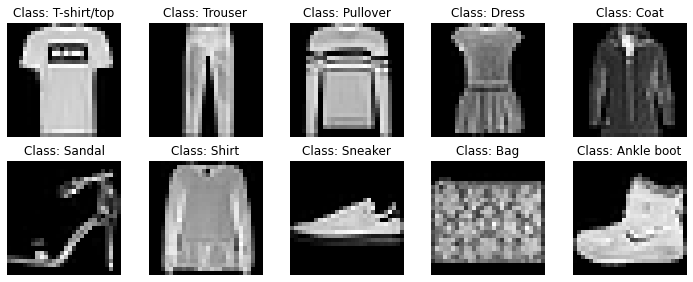

In [0]:
class_labels_dict={0: "T-shirt/top",1:"Trouser",2: "Pullover",3: "Dress",4: "Coat",
                   5: "Sandal", 6: "Shirt", 7: "Sneaker",8: "Bag", 9: "Ankle boot"}
fig=plt.figure(figsize=(10,4))
for i in range (10):
  plt.subplot(2,5,i+1)
  img=X_train[y_train==i][0]
  plt.imshow(img,cmap='gray',interpolation='none')
  plt.title('Class: {}'.format(class_labels_dict[i]))
  plt.axis('off')
plt.tight_layout()

# Format the data

The input to our neural network have to be single vectors rather than 2D images. As a result, we will have to reshape the input so that each 28*28 image becomes a single 784 dimensional vector. Unfortunately, this leads to some loss of information, as it becomes less clear which image pixels ar next to each other.

In [0]:
X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

print('Training matrix shape', X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


we also normalise the inputs so that pixel values are in the [0-1] range rather than [0-255].

In [0]:
X_train=X_train/255
X_test=X_test/255

Sience we have our traget value is in categorical so that we have to do one hot encoding

In [0]:
# convert 1-d class arrays to 10-d class matrices using one hot encoding
num_classes=10 # there are 10 possible classes (0,9)
Y_train=to_categorical(y_train,num_classes)
Y_test=to_categorical(y_test,num_classes)

In [0]:
model=Sequential()
model.add(Dense(512, input_shape=(784,))) # add a dense input layer of 512
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
filepath='mlp-weights.{epoch:02d}-{val_loss:2f}.hdf5'
checkpoint=ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')

history=model.fit(X_train,Y_train,batch_size=128, epochs=30, verbose=2, validation_data=(X_test,Y_test))

Epoch 1/30


Using TensorFlow backend.


469/469 - 6s - loss: 0.4775 - accuracy: 0.8292 - val_loss: 0.4319 - val_accuracy: 0.8388
Epoch 2/30
469/469 - 6s - loss: 0.3470 - accuracy: 0.8725 - val_loss: 0.3756 - val_accuracy: 0.8606
Epoch 3/30
469/469 - 6s - loss: 0.3131 - accuracy: 0.8847 - val_loss: 0.3667 - val_accuracy: 0.8702
Epoch 4/30
469/469 - 6s - loss: 0.2878 - accuracy: 0.8929 - val_loss: 0.3409 - val_accuracy: 0.8794
Epoch 5/30
469/469 - 6s - loss: 0.2720 - accuracy: 0.8971 - val_loss: 0.3544 - val_accuracy: 0.8703
Epoch 6/30
469/469 - 6s - loss: 0.2583 - accuracy: 0.9032 - val_loss: 0.3263 - val_accuracy: 0.8829
Epoch 7/30
469/469 - 6s - loss: 0.2445 - accuracy: 0.9085 - val_loss: 0.3246 - val_accuracy: 0.8856
Epoch 8/30
469/469 - 6s - loss: 0.2310 - accuracy: 0.9115 - val_loss: 0.3126 - val_accuracy: 0.8904
Epoch 9/30
469/469 - 6s - loss: 0.2220 - accuracy: 0.9153 - val_loss: 0.3126 - val_accuracy: 0.8885
Epoch 10/30
469/469 - 6s - loss: 0.2105 - accuracy: 0.9200 - val_loss: 0.3185 - val_accuracy: 0.8860
Epoch 11/3

In [0]:
plt.plot(range(1,1+len(history.history['accuracy'])),(history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])),(history.history['val_accuracy'])
plt.title('model Accuracy vs number of Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend(['train','test'],loc='best')
plt.xticks(np.arrange(0,28,2))
plt.show()

SyntaxError: ignored

In [0]:
best_score=max(history.history['val_accuracy'])
best_epoch=np.array(history.history['val_accuracy']).argmax()+1
print("best test accuracy was %f at epoch %i" %(best_score,best_epoch))

best test accuracy was 0.900500 at epoch 29


# Inspecting the output

In [0]:
y_pred=model.predict_classes(X_test)
# check which item we get right/ wrong
correct_indices=np.nonzero(y_pred==y_test)[0]
incorrect_indices=np.nonzero(y_pred !=y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


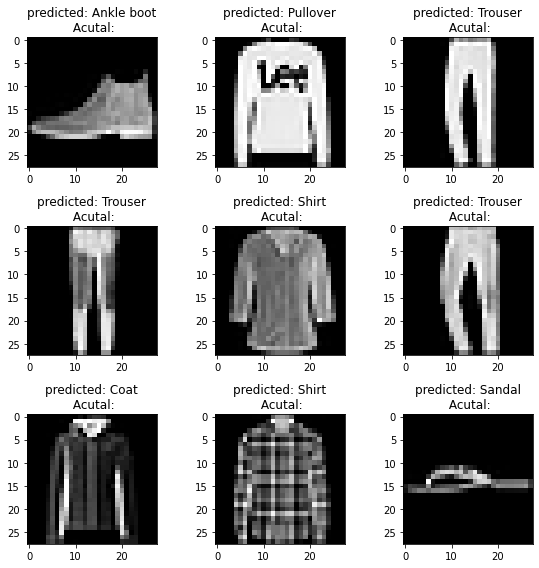

In [0]:
plt.figure(figsize=(8,8))
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray',interpolation='none')
  plt.title("predicted: {}\n Acutal:".format(class_labels_dict[y_pred[correct]],class_labels_dict[y_test[correct]]))
plt.tight_layout()

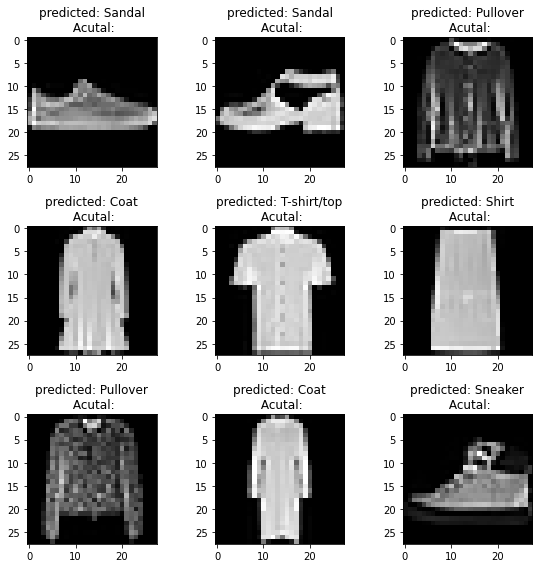

In [0]:
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',interpolation='none')
  plt.title("predicted: {}\n Acutal:".format(class_labels_dict[y_pred[incorrect]],class_labels_dict[y_test[incorrect]]))
plt.tight_layout()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
target_names=[class_labels_dict[x] for x in range (10)]
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.80      0.82      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.80      0.86      0.83      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.74      0.71      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

